In [ ]:
import pandas as pd
import pandas as pd 
import numpy as np
import string
import nltk
import re 
import os 
import random 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/all_data.csv" , lineterminator='\n')

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [ ]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ه", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
def nospecial(text):
	import re
	text = re.sub("[a-zA-Z0-9]+", "",text)
	return text

In [ ]:
def preprocess_text(tweet): 

    #remove emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    tweet = emoji_pattern.sub(r'', tweet)
    
  
    #remove tashkeel
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    tweet = re.sub(p_tashkeel,"", tweet)

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
     #tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #remove non arabic words
    tweet = nospecial(tweet)

    #trim    
    tweet = tweet.strip()

    #   #text stemming
    # from nltk.stem.isri import ISRIStemmer
    # st = ISRIStemmer()
    # ISRIStemmer().suf32(tweet)
    
    return tweet

In [ ]:
df.tweets = df.tweets.map(preprocess_text)
df.head()

,id,tweets,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه وحشيه وتطلبون م...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [ ]:
# from nltk.tokenize import RegexpTokenizer
# tokenizer = RegexpTokenizer(r'\w+')
# df["tweets"] = df["tweets"].apply(tokenizer.tokenize)

In [ ]:
# from nltk.corpus import stopwords
# import nltk

In [ ]:
# nltk.download('stopwords')
# stopwords_list = stopwords.words('arabic')

In [ ]:
# from nltk.corpus import stopwords
# import nltk

In [ ]:
# nltk.download('stopwords')
# stopwords_list = stopwords.words('arabic')

In [ ]:
# df["tweets"]=df["tweets"].apply(lambda x: [item for item in x if item not in stopwords_list])

In [ ]:
# # vocabulary of words present in dataset
# data_vocab = []
# for text in df.tweets:
#     for word in text:
#         if word not in data_vocab:
#             data_vocab.append(word)

In [ ]:
# len(data_vocab)

In [ ]:
df["tweets"]=df["tweets"].apply(lambda x: " ".join(x) )


In [ ]:
df.head()

,id,tweets,dialect
0,1175358310087892992,ل ك ن ب ا ل ن ه ا ي ة ي ن ت ف ض ي غ ي ر,IQ
1,1175416117793349632,ي ع ن ي ه ذ ا م ح س و ب ع ل ى ا ل ب ش ...,IQ
2,1175450108898565888,م ب ي ن م ن ك ل ا م ه خ ل ي ج ي,IQ
3,1175471073770573824,ي س ل م ل ي م ر و ر ك و ر و ح ك ا ل ح ل و ه,IQ
4,1175496913145217024,و ي ن ه ل ا ل غ ي ب ه ا خ م ح م د,IQ


In [ ]:
## Load the data to get started
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re
import keras

In [ ]:
max_fatures = 5000
tokenizer = Tokenizer(num_words = max_fatures , split=' ')
tokenizer.fit_on_texts(df['tweets'].values)
X = tokenizer.texts_to_sequences(df['tweets'].values)
X = pad_sequences(X)

In [ ]:
X.shape

(458197, 61)

In [ ]:
import pickle
  # download tokenizer
with open('tokenizer.pickle', 'wb')as handle:
  pickle. dump(tokenizer, handle, protocol=pickle. HIGHEST_PROTOCOL)                        


In [ ]:
  # loading.
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle. load(handle)

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(Dense(18,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 61, 128)           640000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 61, 128)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense (Dense)               (None, 64)                12608     
                                                                 
 dense_1 (Dense)             (None, 18)                1170      
                                                                 
Total params: 908,578
Trainable params: 908,578
Non-trainable params: 0
__________________________________________________

In [ ]:
!pip install pydot graphviz

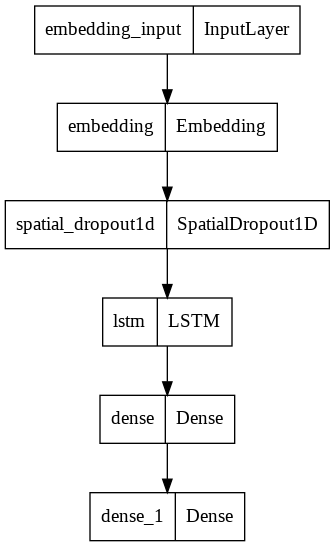

In [ ]:
tf.keras.utils.plot_model(
    model, show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
Y = pd.get_dummies(df['dialect'])

In [ ]:

label_encodding = {
    0:"AE" , 
    1:"BH" ,
    2:"DZ",
    3:"EG",
    4:"IQ",
    5:"JO",
    6:"KW",
    7:"LB",
    8:"LY",
    9:"MA",
    10:"OM",
    11:"PL",
    12:"QA",
    13:"SA",
    14:"SD",
    15:"SY",
    16:"TN",
    17:"YE"}

In [ ]:
Y = pd.get_dummies(df['dialect']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.02, random_state = 42 , shuffle=True )
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(412377, 61) (412377, 18)
(45820, 61) (45820, 18)


In [ ]:
# Creat checkpoint to save model at the end of each epoch:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# Creat EarlyStopping checkpoint:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True)


history = model.fit(X_train, Y_train, epochs = 15 , validation_split = 0.02 , callbacks=[checkpoint_cb, early_stopping_cb], batch_size = 2000)

Epoch 1/10
5800/5800 [==============================] - 3039s 523ms/step - loss: 2.0454 - accuracy: 0.3493 - val_loss: 1.8724 - val_accuracy: 0.4034
Epoch 2/10
5800/5800 [==============================] - 2987s 515ms/step - loss: 1.8518 - accuracy: 0.4118 - val_loss: 1.8241 - val_accuracy: 0.4202
Epoch 3/10
5800/5800 [==============================] - 2991s 516ms/step - loss: 1.7957 - accuracy: 0.4297 - val_loss: 1.8081 - val_accuracy: 0.4252
Epoch 4/10
5800/5800 [==============================] - 2968s 512ms/step - loss: 1.7604 - accuracy: 0.4391 - val_loss: 1.7962 - val_accuracy: 0.4256
Epoch 5/10
5800/5800 [==============================] - 2967s 511ms/step - loss: 1.7368 - accuracy: 0.4468 - val_loss: 1.7840 - val_accuracy: 0.4287
Epoch 6/10
5800/5800 [==============================] - 2977s 513ms/step - loss: 1.7166 - accuracy: 0.4519 - val_loss: 1.7865 - val_accuracy: 0.4278
Epoch 7/10
5800/5800 [==============================] - 2957s 510ms/step - loss: 1.7002 - accuracy: 0.4569

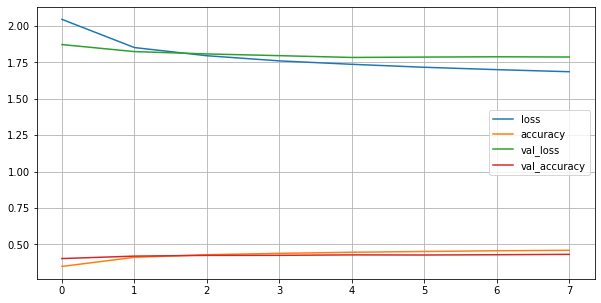

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

learning_data = pd.DataFrame(history.history)
# learning_data.head()
learning_data.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
Y_pred = model.predict(X_test) 

In [ ]:
classes_x = np.argmax(Y_pred,axis=1)

In [ ]:
classes_x

array([13,  5,  9, ...,  3, 12,  8])

In [ ]:
Y_pred

array([[6.0052895e-05, 6.0974224e-05, 1.5123494e-06, ..., 7.9228821e-06,
        2.2509637e-05, 9.2924856e-05],
       [4.0463965e-02, 3.0009059e-02, 3.5261228e-03, ..., 2.9411180e-02,
        1.8279873e-03, 8.1320852e-03],
       [1.2661379e-02, 2.6861025e-02, 2.1530060e-01, ..., 4.1654659e-03,
        2.2157345e-02, 1.3846954e-02],
       ...,
       [3.3399917e-03, 6.6467171e-04, 1.8256120e-03, ..., 4.1573410e-04,
        5.7740738e-03, 1.0921957e-03],
       [6.3066252e-02, 9.6669376e-02, 1.9593343e-02, ..., 4.8638906e-02,
        7.2538052e-03, 3.4486685e-02],
       [2.9972667e-02, 1.6791774e-02, 2.8838557e-01, ..., 2.3643777e-02,
        1.2945279e-02, 1.7273482e-02]], dtype=float32)

In [ ]:
Y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
import numpy as np
Y_test_labels=np.argmax(Y_test, axis=1)
Y_test_labels[1]

6

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(classes_x , Y_test_labels )
cm

array([[ 775,  145,   33,   31,   40,   77,  167,   27,   60,   11,  165,
          71,  171,  110,   13,   22,   22,   32],
       [ 211,  592,   39,   54,   64,  116,  337,   48,  113,   29,  195,
          94,  252,  150,   23,   37,   21,   64],
       [  36,   34,  659,   27,   16,   31,   45,   22,   87,   93,   32,
          44,   20,   45,   12,   33,   51,   16],
       [ 106,   92,  133, 4477,   60,  164,  133,  111,  330,   81,   80,
         433,  100,   94,  231,   71,  116,   80],
       [  42,  112,   20,   17,  650,   64,  165,   36,   56,   16,   32,
          43,   63,   53,   23,   34,    7,   21],
       [  25,   16,   14,   13,   22,  466,   40,   48,   18,    5,   25,
         215,   24,   39,    9,   44,    1,   18],
       [ 489,  627,   80,  101,  208,  194, 1962,   93,  195,   44,  303,
         150,  549,  467,   73,  105,   47,  141],
       [  44,   40,   46,   47,   37,  181,   45, 1600,   53,   19,   44,
         235,   24,   38,   32,  313,   29,   25],


In [ ]:
print(classification_report(Y_test_labels, classes_x))

              precision    recall  f1-score   support

           0       0.39      0.28      0.33      2753
           1       0.24      0.22      0.23      2647
           2       0.51      0.39      0.44      1678
           3       0.65      0.79      0.71      5691
           4       0.45      0.43      0.44      1510
           5       0.45      0.16      0.24      2858
           6       0.34      0.47      0.39      4157
           7       0.56      0.56      0.56      2860
           8       0.41      0.57      0.48      3664
           9       0.59      0.46      0.52      1110
          10       0.30      0.16      0.21      1904
          11       0.36      0.57      0.44      4263
          12       0.40      0.39      0.39      3114
          13       0.31      0.34      0.33      2653
          14       0.68      0.46      0.55      1432
          15       0.47      0.20      0.28      1611
          16       0.59      0.29      0.39       916
          17       0.41    